# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

cloudiness = []
country = []
date = []
humid = []
lat = []
lon = []
max_temp = []
w_speed = []

for index in range(len(cities)):
    response = requests.get(query_url + cities[index]).json()
    print("Processing request " + str(index + 1) + " : " + cities[index])
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(None)
    try:
        country.append(response['name'])
    except KeyError:
        country.append(None)
    try:
        date.append(response['dt'])
    except KeyError:
        date.append(None)
    try: 
        humid.append(response['main']['humidity'])
    except KeyError:
        humid.append(None)
    try:
        lat.append(response['coord']['lat'])
    except KeyError:
        lat.append(None)
    try:
        lon.append(response['coord']['lon'])
    except KeyError:
        lon.append(None)
    try:
        max_temp.append(response["main"]['temp_max'])
    except KeyError:
        max_temp.append(None)
    try:
        w_speed.append(response['wind']['speed'])
    except KeyError:
        w_speed.append(None)

Processing request 1 : moses lake
Processing request 2 : rikitea
Processing request 3 : shihezi
Processing request 4 : pevek
Processing request 5 : vaini
Processing request 6 : auki
Processing request 7 : atambua
Processing request 8 : abeche
Processing request 9 : alofi
Processing request 10 : palmer
Processing request 11 : ribeira grande
Processing request 12 : qaanaaq
Processing request 13 : hilo
Processing request 14 : umzimvubu
Processing request 15 : constitucion
Processing request 16 : phrai bung
Processing request 17 : port alfred
Processing request 18 : albany
Processing request 19 : mount isa
Processing request 20 : ixtapa
Processing request 21 : buraydah
Processing request 22 : chara
Processing request 23 : abu kamal
Processing request 24 : chapada dos guimaraes
Processing request 25 : vardo
Processing request 26 : vanimo
Processing request 27 : thompson
Processing request 28 : longlac
Processing request 29 : ranchpar
Processing request 30 : paradwip
Processing request 31 : 

Processing request 242 : aden
Processing request 243 : zhovtneve
Processing request 244 : yellowknife
Processing request 245 : itarema
Processing request 246 : awjilah
Processing request 247 : leningradskiy
Processing request 248 : akyab
Processing request 249 : hualmay
Processing request 250 : saint anthony
Processing request 251 : imamoglu
Processing request 252 : chapais
Processing request 253 : pemangkat
Processing request 254 : vestmannaeyjar
Processing request 255 : bathsheba
Processing request 256 : linxia
Processing request 257 : solnechnyy
Processing request 258 : yerofey pavlovich
Processing request 259 : kaitangata
Processing request 260 : sawtell
Processing request 261 : komsomolskiy
Processing request 262 : lorengau
Processing request 263 : alice springs
Processing request 264 : mayor pablo lagerenza
Processing request 265 : cockburn town
Processing request 266 : adre
Processing request 267 : arraial do cabo
Processing request 268 : bukama
Processing request 269 : laguna
P

Processing request 480 : macas
Processing request 481 : rorvik
Processing request 482 : jiuquan
Processing request 483 : ca mau
Processing request 484 : longyearbyen
Processing request 485 : malinovoye ozero
Processing request 486 : meyungs
Processing request 487 : pacific grove
Processing request 488 : kununurra
Processing request 489 : ormara
Processing request 490 : mudyuga
Processing request 491 : byron bay
Processing request 492 : ngukurr
Processing request 493 : kibala
Processing request 494 : cootamundra
Processing request 495 : kalat
Processing request 496 : namibe
Processing request 497 : aklavik
Processing request 498 : kano
Processing request 499 : hambantota
Processing request 500 : adrar
Processing request 501 : codrington
Processing request 502 : turukhansk
Processing request 503 : santana
Processing request 504 : caravelas
Processing request 505 : kushima
Processing request 506 : daru
Processing request 507 : kuala terengganu
Processing request 508 : tamiahua
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dic = {
    "City" : cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humid,
    "Lat" : lat,
    "Lng" : lon,
    "Max Temp" : max_temp,
    "Wind Speed" : w_speed
}
len(weather_dic)

9

In [5]:
weather_pd = pd.DataFrame(weather_dic)
weather_pd = weather_pd.dropna(how="any")
weather_pd.head()

weather_pd.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

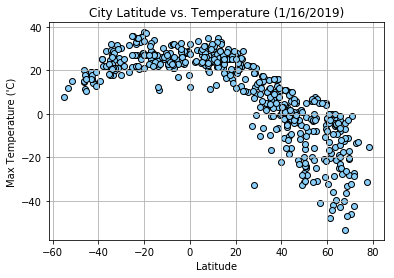

In [10]:
x_lat = weather_pd["Lat"]
y_temp = weather_pd["Max Temp"]
plt.scatter(x_lat, y_temp, marker="o", facecolors="lightskyblue", edgecolors="black",
            alpha=1)
plt.grid(True)
plt.title("City Latitude vs. Temperature (1/16/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature ('C)")

plt.savefig("output/Latitude vs. Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

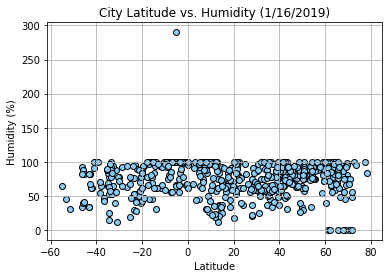

In [11]:
y_humid = weather_pd["Humidity"]
plt.scatter(x_lat, y_humid, marker="o", facecolors="lightskyblue", edgecolors="black",
            alpha=1)
plt.grid(True)
plt.title("City Latitude vs. Humidity (1/16/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output/Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

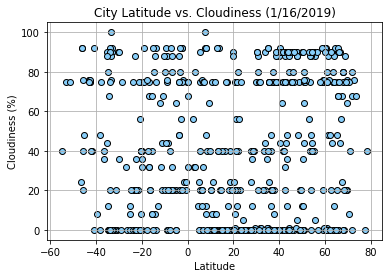

In [12]:
y_cloud = weather_pd["Cloudiness"]
plt.scatter(x_lat, y_cloud, marker="o", facecolors="lightskyblue", edgecolors="black",
            alpha=1)
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (1/16/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output/Latitude vs. Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

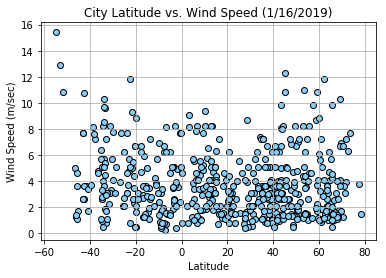

In [13]:
x_lat = weather_pd["Lat"]
y_wspeed = weather_pd["Wind Speed"]
plt.scatter(x_lat, y_wspeed, marker="o", facecolors="lightskyblue", edgecolors="black",
            alpha=1)
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (1/16/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/sec)")

plt.savefig("output/Latitude vs. Wind Speed Plot.png")
plt.show()